In [1]:
from boxoffice.db.frames import get_movie_frame_full

df = get_movie_frame_full()

MOVIES_DB_PATH: boxoffice/db/data/data.sqlite
MOVIES_DB_PATH: ../boxoffice/db/data/data.sqlite
Reading from movies.csv


In [2]:
highest_openings = df.sort_values('opening_weekend_revenue', ascending=False).head(5)

print(highest_openings[['title', 'opening_weekend_revenue']])

                                     title  opening_weekend_revenue
2032                     Avengers: Endgame                357115007
2205               Spider-Man: No Way Home                260138569
1905                Avengers: Infinity War                257698183
1594  Star Wars Ep. VII: The Force Awakens                247966675
1850     Star Wars Ep. VIII: The Last Jedi                220009584


Text(0.5, 1.0, 'Top 20 Opening Weekends')

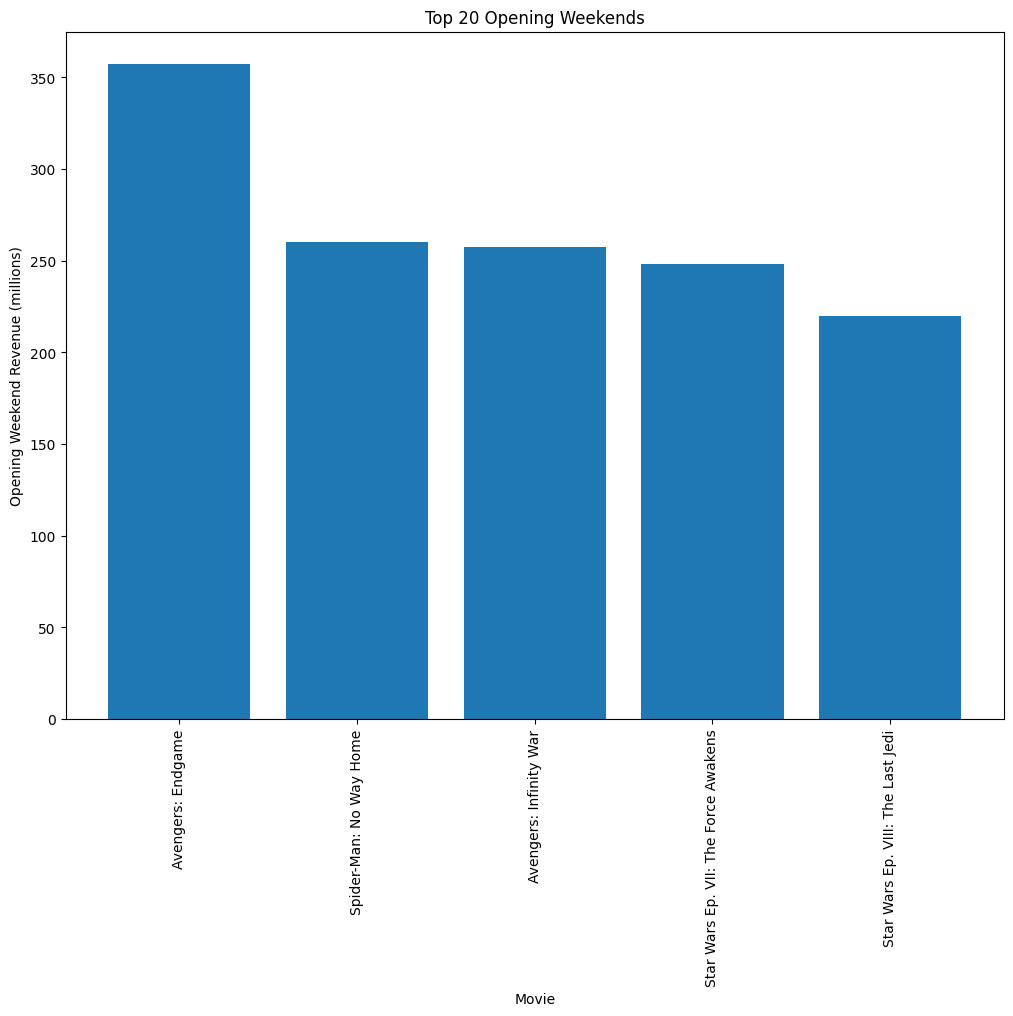

In [3]:
from matplotlib import pyplot as plt
from PIL import Image
from io import BytesIO
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# create a column chart and then include posters
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(highest_openings['title'], highest_openings['opening_weekend_revenue'])

# for i, row in highest_openings.iterrows():
#     ax.text(row['title'], row['opening_weekend_revenue'], row['opening_weekend_revenue'], ha='center', va='bottom')

    # image_url = row['poster']

    # if image_url:
    #     print(image_url)
    #     response = requests.get(image_url, stream=True, headers=headers)
    #     if response.status_code == 200:
    #         img = Image.open(BytesIO(response.content))
    #         # make the image max size 10% of the height of the chart
    #         img = img.resize((int(0.1*fig.get_figheight()*fig.dpi), int(0.1*fig.get_figheight()*fig.dpi)))
    #         ax.imshow(img, extent=(i-0.4, i+0.4, 0, 0.5), aspect='auto')
    #     else:
    #         print('Failed to get image')

plt.xticks(rotation=90)
plt.tight_layout()
# fix the y axis to be in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000000))))

# set x and y axis labels
plt.xlabel('Movie')
plt.ylabel('Opening Weekend Revenue (millions)')
plt.title('Top 20 Opening Weekends')

https://www.the-numbers.com/images/movies/opusdata/Star-Wars-Ep-VIII-The-Last-Jedi-Thumbnail.jpg
100
https://www.the-numbers.com/images/movies/opusdata/Star-Wars-Ep-VII-The-Force-Awakens-Thumbnail.jpg
100
https://www.the-numbers.com/images/movies/opusdata/Avengers-Infinity-War-Thumbnail.jpg
100
https://www.the-numbers.com/images/movies/opusdata/Spider-Man-No-Way-Home-(2021)-Thumbnail.jpg
100
https://www.the-numbers.com/images/movies/opusdata/Avengers-Endgame-(2019)-Thumbnail.jpg
100


(np.float64(0.0), np.float64(4.0), np.float64(0.0), np.float64(6.0))

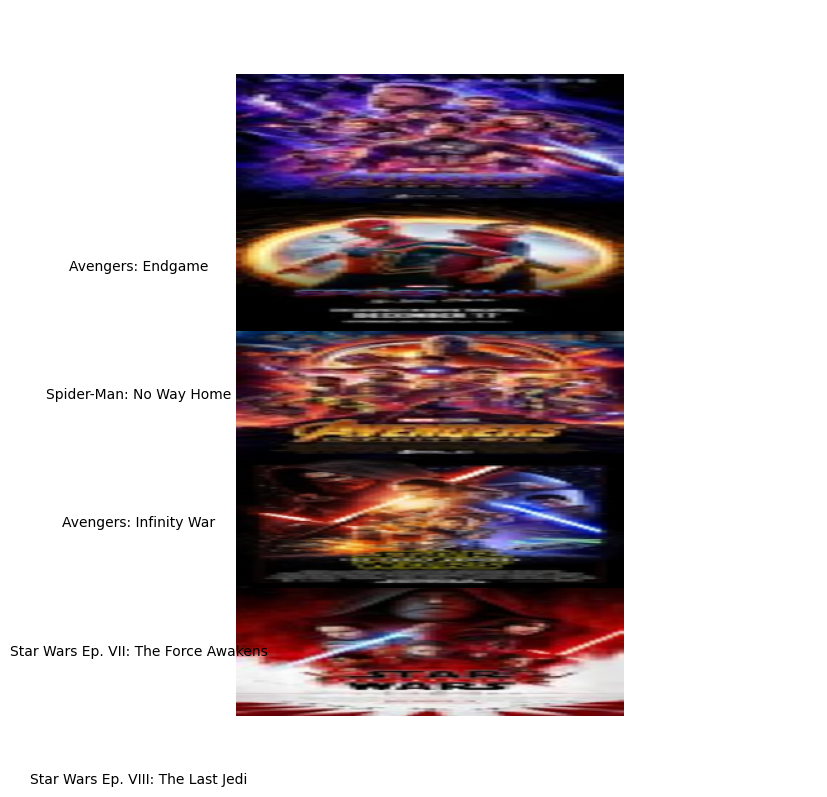

In [10]:
# now make a table with poster images
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(10, 10))

# set the size of the axes
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)

index = 0
for i, row in reversed(list(highest_openings.iterrows())):
    ax.text(x=0.5, y=index, s=row["title"], ha="center", va="center")

    image_url = row["poster"]

    if "Thumbnail" not in image_url:
        image_url = image_url.replace(".jpg", "-Thumbnail.jpg")

    if image_url:
        print(image_url)
        response = requests.get(image_url, stream=True, headers=headers)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            # make the image max size 10% of the height of the chart
            max_size = int(0.1 * fig.get_figheight() * fig.dpi)
            print(max_size)
            img.thumbnail((max_size, max_size))
            ax.imshow(img, aspect="auto", extent=(1, 3, index + 0.5, index + 1.5))
        else:
            print("Failed to get image")

    index += 1

ax.axis("off")